
# **Filter Methods**

# **Categorical Feature Selection**

Feature selection is the process of identifying and selecting a subset of input features that are most relevant to the target variable.

Feature selection is often straightforward when working with real-valued data, such as using the Pearson’s correlation coefficient, but can be challenging when working with categorical data.

The two most commonly used feature selection methods for categorical input data when the target variable is also categorical (e.g. classification predictive modeling) are the following:

> Chi-Squared Statistic.

> Mutual Information Statistic.

## Chi-Squared Feature Selection

Pearson’s chi-squared statistical hypothesis test is an example of a **test for independence between categorical variables.**

In [1]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

from sklearn.preprocessing import OrdinalEncoder
# Encode categorical features as an integer array.
# The input to this transformer should be an array-like of integers or strings, denoting the values taken on 
# by categorical (discrete) features. The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.


from sklearn.preprocessing import LabelEncoder
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X.

## Have a Look at the Dataset

In [23]:
import pandas as pd
df = pd.read_csv('breast-cancer.csv')
df

,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
0,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
1,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
2,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
3,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
4,'50-59','premeno','25-29','3-5','no','2','right','left_up','yes','no-recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
280,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
281,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
282,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
283,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


## Custom Data Preprocessing Functions

We can use the **OrdinalEncoder()** from scikit-learn to encode each variable to integers. 
This is a flexible class and does allow the order of the categories to be specified as arguments if any such order is known

We also need to prepare the target variable.

It is a binary classification problem, so we need to map the two class labels to 0 and 1. This is a type of ordinal encoding, and scikit-learn provides the **LabelEncoder** class specifically designed for this purpose. 
We could just as easily use the OrdinalEncoder and achieve the same result, although the LabelEncoder is designed for encoding a single variable.

In [2]:
# Load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# Prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# Prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# Feature Selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [3]:
# Load the dataset
X, y = load_dataset('breast-cancer.csv')

In [4]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [5]:
# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [18]:
# Feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [21]:
# What are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]*100))

Feature 0: 0.876687
Feature 1: 0.000000
Feature 2: 6.409747
Feature 3: 1.350069
Feature 4: 5.234148
Feature 5: 0.940715
Feature 6: 8.016371
Feature 7: 0.872038
Feature 8: 0.400820


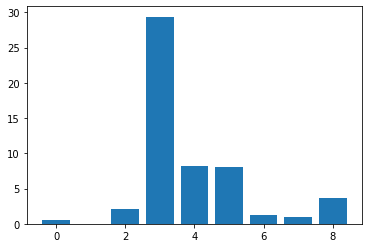

In [8]:
# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual Information Feature Selection

Mutual information from the field of information theory is the application of information gain (typically used in the construction of decision trees) to feature selection.

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

The scikit-learn machine learning library provides an implementation of mutual information for feature selection via the **mutual_info_classif()** function.

Like chi2(), it can be used in the SelectKBest feature selection strategy (and other strategies).



In [9]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

## Custom Data Preprocessing Functions

In [11]:
# Load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# Prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# Feature Selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [12]:
# Load the dataset
X, y = load_dataset('breast-cancer.csv')

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [14]:
# Feature Selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

In [15]:
# What are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.012544
Feature 1: 0.000000
Feature 2: 0.078744
Feature 3: 0.026247
Feature 4: 0.063589
Feature 5: 0.017593
Feature 6: 0.000000
Feature 7: 0.006257
Feature 8: 0.000000


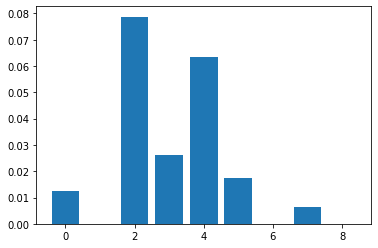

In [16]:
# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()